# Домашняя работа 1
## В данном задании мы будем сжимать звуковую дорожку при помощи алгоритма PCA

In [ ]:
# Понадобится для чтения и записи аудио файлов
from scipy.io import wavfile

# Это нужно для проигрывания аудио файлов прямо в блокноте
from IPython.display import Audio

# А это набор для этого задания
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Скачаем данные
! wget https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav

--2022-12-16 13:01:16--  https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav [following]
--2022-12-16 13:01:16--  https://www.dropbox.com/s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucccdec45e350f92ef6cfcd3b3ae.dl.dropboxusercontent.com/cd/0/inline/BysL9eSUf5eehgdhuxn5mgLfM7gWIR72gbuBx5K8d30oNG9yeIjpglnnJU9d-DJpZNAHh-79NbJN8TwZDBH4hr_mpfE2BVt2tLlm3li922x8HtHxDdAsB_XSS6VXnpX7jT6qgXQ98YAQE43QnpsbkQlQ4jVVfk3ULHaId2FWpexUoQ/file# [following]
--2022-12-16 13:01:17--  https://ucccdec45

In [ ]:
# Прочитаем аудио дорожку при помощи wavfile
samplerate, data = wavfile.read('Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')

`samplerate` есть частота дискретизации - стандартное для аудио значние -- 44100 Гц.

NOTE: **Частота дискретизации** говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука [тут](https://ru.wikipedia.org/wiki/Кодирование_звуковой_информации).

In [ ]:
# Посмотрим какая у нас частота диспретезации
print(samplerate)
len(data)

44100


1990656

In [ ]:
# Если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

print(len(data) / samplerate)

# 45 секунд - похоже на правду:)

45.139591836734695


In [ ]:
# Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

'''print(data.shape)
data1=np.array([1,1,3,4,5,6,2,6,2,3,6,3]).reshape(2,2,3)
print(data1)
data1[:,1,1]'''
data.shape

(1990656, 2)

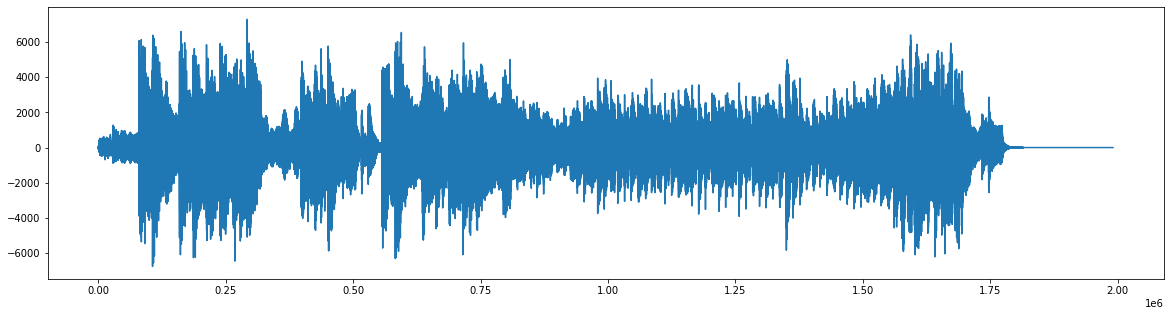

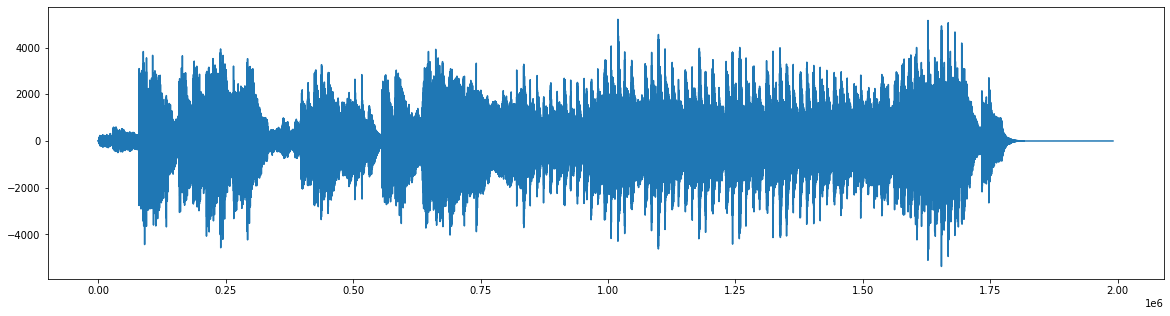

In [ ]:
# Отрисуем сигналы в обоих каналах

# Канал 1
plt.figure(figsize=(20,5))
plt.plot(data[:,0])
plt.show()

# Канал 2
plt.figure(figsize=(20,5))
plt.plot(data[:,1])
plt.show()

In [ ]:
# Усредним каналы, и получим моно звук, с которым будет проще работать

mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)
mono_sound

(1990656,)


array([ 0., -1., -1., ...,  0.,  0.,  0.])

In [ ]:
# Давайте послушаем наконец, что же мы будем сжимать:)

Audio(mono_sound, rate = samplerate)

In [ ]:
# Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, датасет из которых и необходимо будет сжать известными вам методами.
# На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки, только здесь задача еще проще)

mono_sound_to_cut = mono_sound[:1990000]
#len(mono_sound_to_cut)/44100

In [ ]:
# Проверим, что наш звук теперь это просто вектор числел

print(mono_sound_to_cut.shape)

(1990000,)


#### Задание 1:

**Подсказка:** В это задании нужно всего лишь вспомнить как пользоваться методом `.reshape()`


1. Разделите сигнал на равные части (длину каждой части возьмите равной 1000) и соберите из них "датасет", который будет представлять из себя двухменый массив - "матрицу", в которой каждая часть сигнала длины 1000 находится в отдельной строке).

    То есть первая часть содержит первые 1000 чисел сигнала и находится в первой строке матрицы, вторая часть следующие 1000 чисел сигнала и находится во второй строке матрицы и так далее.

    Это также как мы делали с кусочками картинки и получали матрицу размера `(24, 1152000)`!

In [ ]:
# Ваше решение здесь
mono_sound_df = mono_sound_to_cut.reshape(-1,1000)
from numpy import linalg as LA
cor = np.cov(mono_sound_df)

2. Напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал, то есть разворачивать данные обратно из матрицы размера `(число объектов, 1000)` в вектор длины `(число объектов * 1000)`. Проверьте, что все работает верно, путем воспроизведения "востановленного" сигнала -- он должен совпасть в точности с изначальным (ведь им на самом деле и является).

In [ ]:
# Ваше решение здесь
def to_sound(mtrx):
  return mtrx.reshape(len(mtrx)*1000)
data_sound = to_sound(mono_sound_df)
(data_sound == mono_sound_to_cut).sum()
np.array_equal(data_sound,mono_sound_to_cut)

True

In [ ]:
mono_sound_df.shape

(1990, 1000)

#### Задание 2

Подсказка: код этого пункта практически полностью совпадает с кодом, который мы использовали на семинаре.

1. Выполните PCA преобразование нашей матрицы, и получите данные, сжатые в пространство меньшей размерности.

    На этом этапе у нас есть наш "датасет" с 1000 "признаками" и мы хотим уменьшить число "признаков" путем применения метода PCA. Число компонент предлагается выбрать вам, но для начала не стоит брать слишком маленькое число, чтобы потом было проще понять, в случае плохого результата -- компонент оказалось недостаточно или вы где-то ошиблись:)


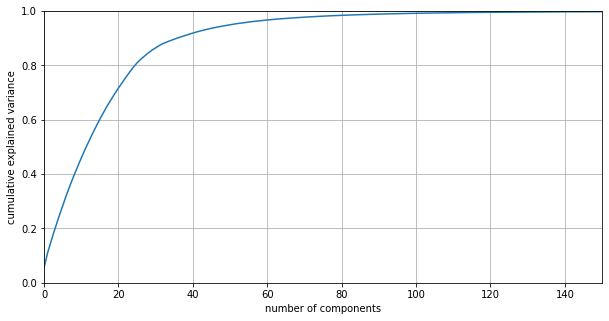

In [ ]:
# Ваше решение здесь
from sklearn.decomposition import PCA
'''pca = PCA(n_components=0.98)
mono_sound_pca = pca.fit_transform(mono_sound_df)
mono_hat = pca.inverse_transform(mono_sound_pca)
len(pca.components_)'''
pca = PCA().fit(mono_sound_df)
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axis([0, 150, 0, 1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [ ]:
pca = PCA(n_components=0.98)
mono_sound_pca = pca.fit_transform(mono_sound_df)
#mono_hat = pca.inverse_transform(mono_sound_pca)
print(len(pca.components_))
print(pca.components_)
print()
print(pca.explained_variance_)
print()
print(pca.explained_variance_ratio_)

75
[[ 0.01610444  0.01756474  0.0191055  ...  0.01575156  0.01407697
   0.01248191]
 [-0.05178559 -0.05325507 -0.05467971 ...  0.0539636   0.05216986
   0.05036858]
 [ 0.01190671  0.01178354  0.01158916 ...  0.01987407  0.02171399
   0.02333951]
 ...
 [-0.02204406 -0.03248348 -0.03940328 ... -0.03899347 -0.03445676
  -0.026975  ]
 [ 0.0682774   0.06463266  0.05597087 ...  0.06341061  0.06926179
   0.0662541 ]
 [ 0.02466185  0.0169719   0.00848456 ...  0.03035163  0.02903748
   0.025941  ]]

[28604777.61393451 28139006.29911523 22794062.78496616 21971534.76865292
 21052641.14169364 19983397.99121257 19769973.97260072 18437803.54094935
 17633973.22509206 16495947.88282699 16212958.63742134 15639413.70112073
 14876193.04167461 14528259.90782179 13758035.15691033 13312463.81665588
 12630461.45899173 12215622.63377883 11143925.70603452 11054489.72057439
 10500598.20327561 10097972.07945406  9806875.4067466   9569944.0463533
  8940759.52480569  8209258.39686055  6679711.49737837  5918157.713


2. Постройте сами две главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

    То есть необходимо применить метод PCA к нашей матрице с числом компонент, равным 2 (тем самым получив датасет с 2 "признаками"). Это позволит нам отрисовать данные на плоскости, чтобы попытаться уловить зависимости.

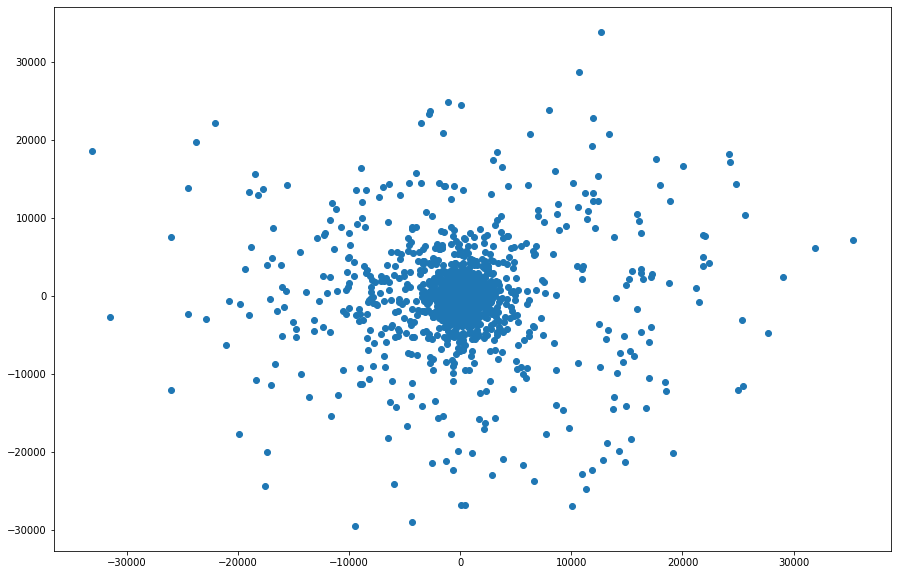

In [ ]:
# Ваше решение здесь
pca_2 = PCA(n_components=2)
mono_sound_pca_2 = pca_2.fit_transform(mono_sound_df)
mono_hat_2= pca_2.inverse_transform(mono_sound_pca_2)
plt.figure(figsize=(15, 10))
plt.scatter(mono_sound_pca_2[:, 0], mono_sound_pca_2[:, 1])#, alpha = 0.1)#c=Y[:, 2], alpha=0.1)

3. Постройте scatter plot датасета в пространстве первых двух компонент, а третью используйте как цвет.
    То есть необходимо применить метод PCA уже с 3 компонентами и нарисовать опять точки, только передав третью компоненту в качестве цвета. (мы также делали на семинаре с картинкой)

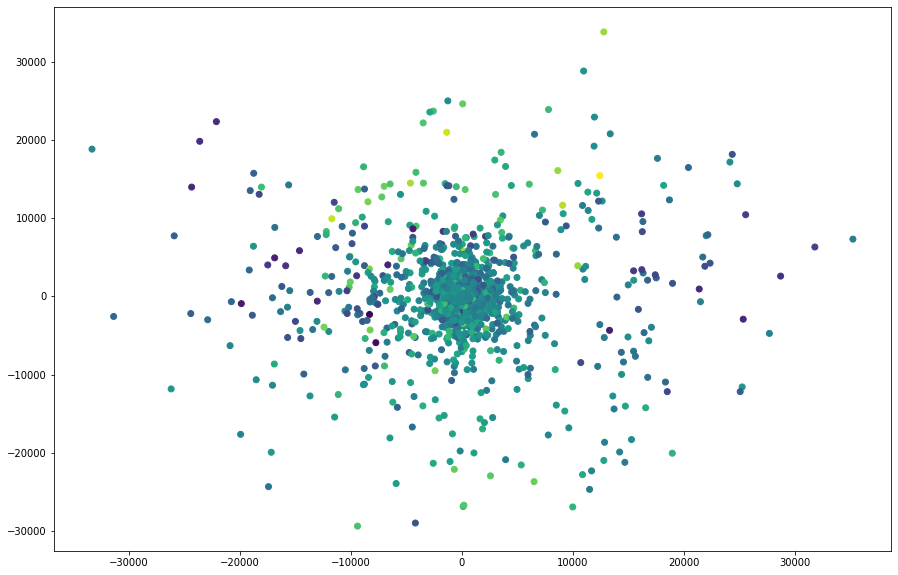

In [ ]:
# Ваше решение здесь
pca_3 = PCA(n_components=3)
mono_sound_pca_3 = pca_3.fit_transform(mono_sound_df)
mono_hat_3 = pca_3.inverse_transform(mono_sound_pca_3)
plt.figure(figsize=(15, 10))
plt.scatter(mono_sound_pca_3[:, 0], mono_sound_pca_3[:, 1], c = mono_sound_pca_3[:, 2])

#### Задание 3

Нам осталось заняться непосредственно "сжатием" звука и проверкой правильности наших действий.

1. Выполните обратное PCA преобразование сжатых данных и получите "матрицу" с сжатым звуком.

    Воспользуйтесь обратным преобразованием PCA (inverse_transform), чтобы из матрицы размера `(число объектов, число компонент)` перейти в матрицу размера `(число объектов, 1000)`.

In [ ]:
# Ваше решение здесь
mono_hat = pca.inverse_transform(mono_sound_pca)
#mono_sound_pca.shape
#pca.inverse_transform(mono_sound_pca).shape
#mono_hat.shape

2. Преобразуйте "матрицу", получившуюся обратным преобразованием, в сигнал (одномерный массив, наш "сжатый" монозвук), и послушайте результат `(Audio(YOUR_RESULT, rate = samplerate)`.

    Воспользуйтесь функцией, которую написали в первом задании, чтобы преобразовать матрицу с "сжатым" звуком (размер после обратного преобразования должен быть такой же, как и у оригинальной матрицы) в вектор-сигнал, который уже можно будет прослушать. Если звук похож на оригинал, то вы все сделали правильно! 

In [ ]:
# Ваше решение здесь
#mono_hat.reshape(-1,).shape
from scipy.ndimage import gaussian_filter1d
restored_sound = to_sound(mono_hat)
Audio(restored_sound, rate = samplerate)

In [ ]:
#mono_hat_2.reshape(-1,).shape
restored_sound_2 = to_sound(mono_hat_2)
Audio(restored_sound_2, rate = samplerate)

In [ ]:
#mono_hat_3.reshape(-1,).shape
restored_sound_3 = to_sound(mono_hat_3)
Audio(restored_sound_3, rate = samplerate)

3. Исследуйте зависимость качества звука от числа компонент. Подберите "на слух" минимальное число компонент, при котором звук практически не отличается от оригинала.

    Добавьте в ячейки два варианта звуковой дорожки -- оригинальную и выбранную вами. Укажите какое число компонент вы оставили.

In [ ]:
# На слух терпимо сжатие 130 компонент, внизу проигрывается соединенные 2 отрывка: первый - оригинальный, второй - восстановленный из сжатого в 130 компонент
pca_130 = PCA(n_components=130)
mono_sound_pca_130 = pca_130.fit_transform(mono_sound_df)
mono_hat_130 = pca_130.inverse_transform(mono_sound_pca_130)
restored_sound_130 = to_sound(mono_hat_130)
#print(np.cumsum(pca_130.explained_variance_ratio_)[-1])
mono_two_sounds = np.concatenate([mono_sound_df, mono_hat_130])
restored_two_sounds = to_sound(mono_two_sounds)
Audio(restored_two_sounds, rate = samplerate)

Подсказка! попробуйте отфильтровать сигнал с помощью функции `gaussian_filter1d` из `scipy.ndimage`. Это поможет убрать неприятный дробовой шум при сильном сжатии

Пример кода для фильтрации - `Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)`

In [ ]:
# Ваше решение здесь
# Для 3-ех компонент преобразование не помогло убрать шум
Audio(gaussian_filter1d(restored_sound_3, 2), rate = samplerate)


3.1   Ответьте на вопросы: 
- Количество компонент, которое вы выбрали это много или мало? 
- Как сильно можно сжать звук таким образом? 
- А если нам дадут другую звуковую дорожку, нам надо сделать то же самое, чтобы сжать звук, как автоматически подобрать число компонент и возможно ли это?




In [ ]:
# Ваше решение здесь
# 130 компонент, мне кажется, это много
# При сохранении сжатого файла с помощью 130 компонент, мы видим, что его размер увеличился 
# более, чем в 2 раза, поэтому можем сделать вывод, что данный способ не подходит для сжатия звукового файла
import os
wavfile.write('/content/mono.wav', rate = 44100, data = restored_sound_130)
os.path.getsize('/content/mono.wav')
# Оптимальное Число компонент можно подобрать, если построить график зависимости числа компонент от суммарной 
# объясненной дисперсии данных (ее доли), на котором видна сохранность вариативности информации при сжатии

15920058

4. (доп задание)

  a) Оберните получившийся код по сжатию звука в одну или несколько функций

  b) Проведите исследование того, как степень сжатия (соотношения размера частей, на которые делился сигнал в задании 1.1 к размеру пространсва, в которое вы сжимали данные с помощью PCA) влияет на звук, по субъективным ощущениям. Начиная с какой степени сжания сильно слышится потеря качества? (как с учетом фильтрации с помощью gaussian_filter1d, так и без неё)

  d) Что степень сжатия означает для PCA? Для большой аудиозаписи (3 мин, например) мы хотели бы разбить на большее, меньшее или такое же число отрезков как и для предложенной аудиозаписи? Почему?

  c) Можно ли как-то автоматически подобрать степерь сжатия? За что она отвечает в нашей задаче. Как степень сжатия влияет на звук? Почему она так влияет на звук? 



In [ ]:
# Ваше решение здесь
# sound_data Массив данных
# semplerate Частота дискретизации
# part_size Количество признаков
# n_components Количество компонент
# add_original Добавить ли оригинальные данные к воспроизводимому сжатому звуку
# gaussian Использовать фильтр Гаусса
def pca_sound(sound_data, semplerate, part_size, n_components = 50, add_original = True, gaussian = True):
  N = sound_data.shape[0]
  sound_data = sound_data[:N-(N % part_size)]
  sound_mono = np.mean(sound_data, axis=1)
  sound_mono_mtrx = sound_mono.reshape(-1,part_size)
  pca = PCA(n_components = n_components)
  sound_mono_pca = pca.fit_transform(sound_mono_mtrx)
  sound_hat = pca.inverse_transform(sound_mono_pca)
  restored_sound = sound_hat.reshape(len(sound_hat)*part_size)
  print(round((100 - np.cumsum(pca.explained_variance_ratio_)[-1]*100), 2), '% потерь вариативности информации')
  print()
  print(f"{n_components/part_size: 0.2} - степень сжатия \n")
  if add_original:
    if gaussian:
      mono_two_sounds = np.concatenate([np.mean(data,axis = 1)[:N-(N % part_size)], restored_sound])
      return gaussian_filter1d(mono_two_sounds, 2)
    else:
      return mono_two_sounds
  elif gaussian:
    return gaussian_filter1d(restored_sound, 2)
  else:
    return restored_sound
  

In [ ]:
Audio(pca_sound(data, samplerate, 500000, 2, False, False), rate = samplerate)

Мне кажется, допустимая потеря информации (вариативности информации) не более 0.1 процента, далее начинается заметное ухудшение качества, фильтр Гаусса незначительно помогает избавиться от возникающих шумов. На заданных цифрах(1000 признаков) это достигается при коэффициенте сжатия около 0.2(соотношение количества компонент к количеству признаков) , при увеличении количества признаков, например, в 10 раз, происходит уменьшение коэффициента сжатия еще в 10 раз, а если в 100 раз увеличить размерность признаков, то коэффициент можно уменьшить в 10000 раз 

Степень сжатия для PCA обозначает поиск направлений наибольших изменений в данных. Если бы запись была большого размера, то принцип был бы тот же для сжатия: надо делить массив на большее количество признаков, тогда удастся сжать ее наименьшим коэффициентом. Думаю, что это обеспечивает данным не такие моментальные изменения, меньшую вариативность.

Степень сжатия можно подобрать по кумулятивной доле объясненной дисперсии, устремив ее к 1, в нашей задаче она отвечает за оптимальное количество признаков, описывающих данные
При большей степени сжатия начинают пропадать самые высокие частоты, так как они самые изменчивые в данных звука.